In [1]:
import histogram_manager as hm
import utils
import stage2
import numpy as np
import ROOT
from scipy import special

det_map1 = utils.load_det_map("../data/run_info_2019apr.toml")
# det_map1 = utils.load_det_map("../data/run_info_test.toml")
det_angle1 = det_map1["angle"]

# det_map2 = utils.load_det_map("../data/run_info2.toml")
# det_angle2 = det_map2["angle"]
hists1 = hm.HistogramManager('../output/stage0_output_test.root')
print(hists1)

Welcome to JupyROOT 6.28/00
<HistogramManager(filename='../output/stage0_output_test.root', total_objects=160)>


Name         | Type  
----------------------
hEgam        | 📂 TH1D
hEn          | 📂 TH1D
hEn_gate9043 | 📂 TH1D
hEn_gate9394 | 📂 TH1D
hTOF_mus     | 📂 TH1D


In [2]:
hists1.rebin("hEn_gate9394", 200)
hists1.add_by_angle('hEn_gate9394_rebin200',det_angle1)
# hists1.subtract_background("hEn_gate9394_rebin400",2.5,18)

# hists1.add_by_angle('hEn_gate9394_rebin400_bkgsub',det_angle1)


# hists1.subtract_background("hEn_beamcorr_pucorr_angle",3.5,5.5)

# hists1.write("test.root")

print(hists1)

# hists1.calc_A_LH("hEn_gate_FA_beamcorr_pucorr_rebin50_bkgsub_angle",4.508,0.3)

# hists1

# hists2 = hm.HistogramManager('../output/stage1_output_all2.root')
# hists2.add_by_angle('hEn_gate_FA_beamcorr_pucorr_bkgsub',det_angle2)
# hists2.add_by_angle('hEn_beamcorr_pucorr',det_angle2)
# # hists2.write("test.root")

# hists_all = hists1 + hists2
# hists_all.write("test.root")

<HistogramManager(filename='../output/stage0_output_test.root', total_objects=199)>


Name                        | Type  
-------------------------------------
hEgam                       | 📂 TH1D
hEn                         | 📂 TH1D
hEn_gate9043                | 📂 TH1D
hEn_gate9394                | 📂 TH1D
hEn_gate9394_rebin200       | 📂 TH1D
hEn_gate9394_rebin200_angle | 📂 TH1D
hTOF_mus                    | 📂 TH1D


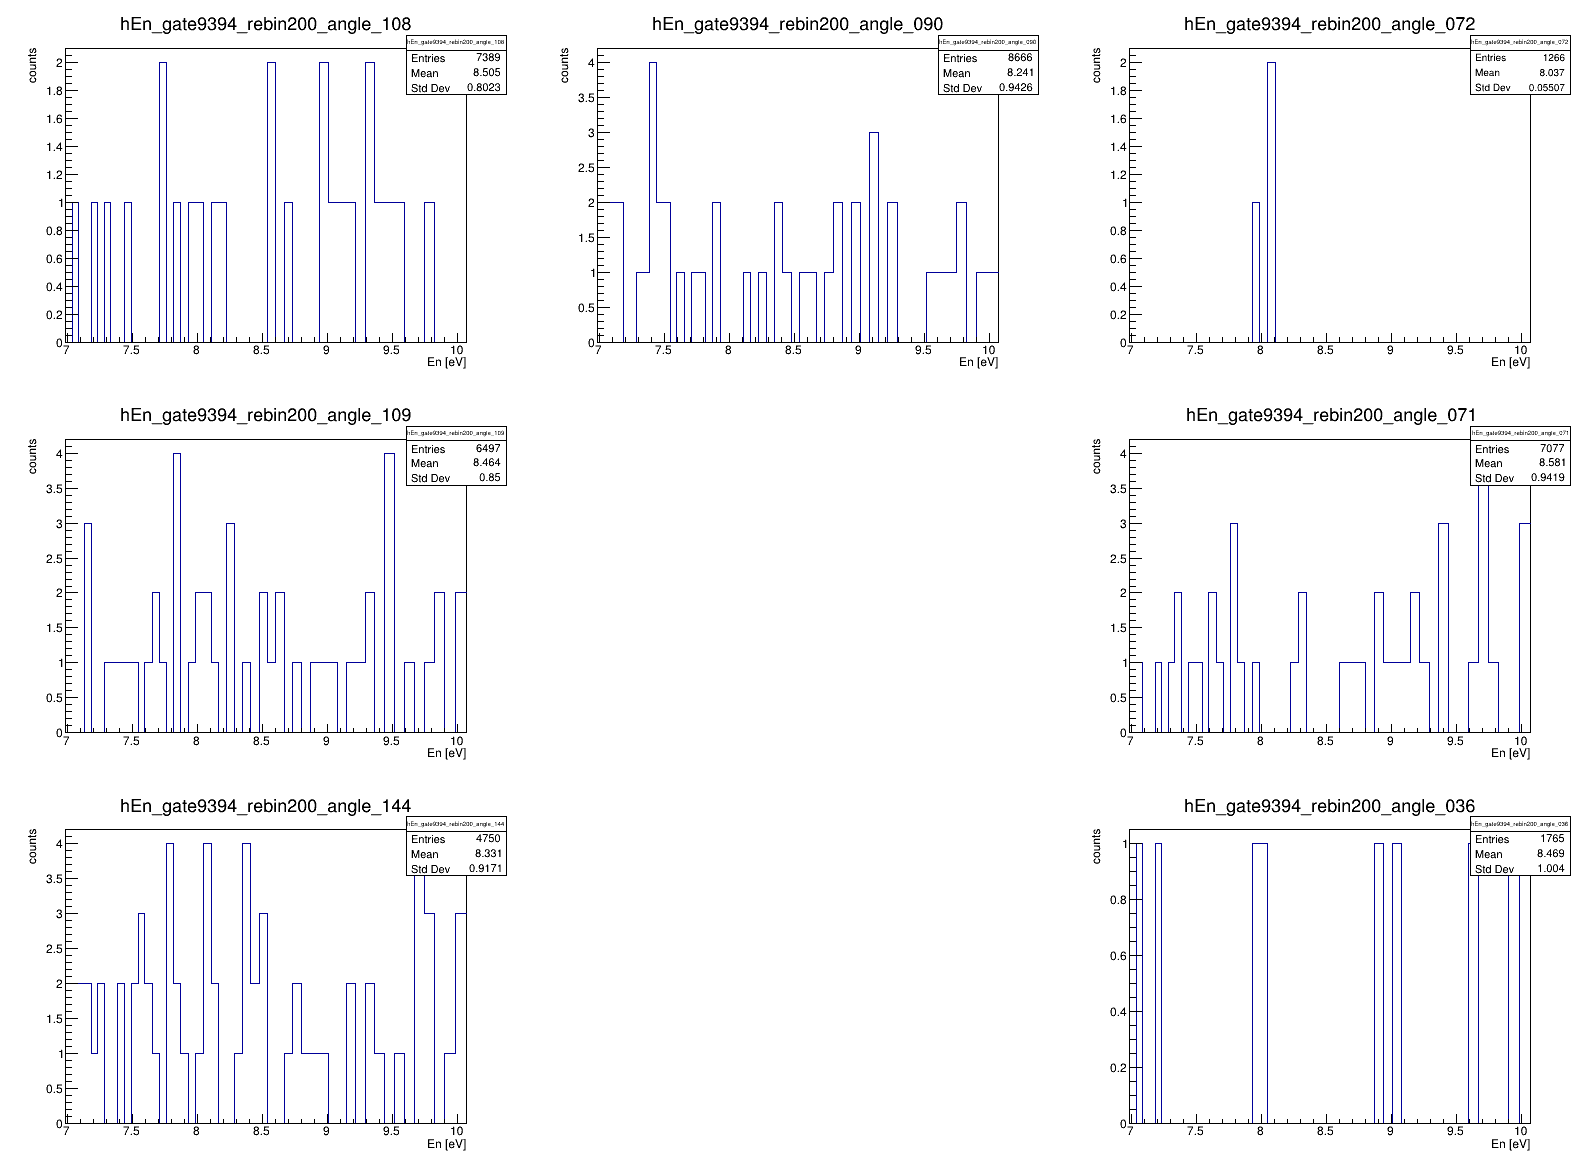

In [3]:
%jsroot off

# c = hists_all.plot_by_angle('hEn_gate_FA_beamcorr_pucorr_bkgsub_angle',13.752-1,13.752+1,50)
# c2 = hists_all.plot_by_angle('hEn_beamcorr_pucorr_angle',13.752-1,13.752+1,25)
# c.Draw()
# c2.Draw()

# c = hists1.plot_by_angle("hEn_gate9394_rebin400_angle",3,6)
c = hists1.plot_by_angle("hEn_gate9394_rebin200_angle",7,10)

c.Draw()

# c2 = hists1.plot_folder("hEgam",6500,6800)
# c2.Draw()



In [4]:
# %jsroot on

# c = ROOT.TCanvas()
# hist = hists1.get("hEn_gateFASE_beamcorr_pucorr_angle_144")
# hist = hist.Clone()
# hist.Rebin(50)
# hist.Draw()
# hist.GetXaxis().SetRangeUser(3.5,5.5)
# hist_bkg = hist.ShowBackground(40,"same")
# hist_bkgsub = hist - hist_bkg
# hist_bkgsub.Draw("same")
# hist_bkgsub.SetLineColor(ROOT.kGreen)
# c.Draw()

In [5]:
%jsroot on

print(hists1)

# A_LH_angle, dA_LH_angle = hists1.calc_A_LH("hEn_gate9394_rebin400_angle",4.53,1.5) #4.64
A_LH_angle, dA_LH_angle = hists1.calc_A_LH("hEn_gate9394_rebin200_angle",8.8,1) #4.64



# print(A_LH_angle)
# print(dA_LH_angle)

# print(det_angle1)
# A_LH_angle = np.array(A_LH_angle)

angle = np.array([36,71,72,90,108,109,144])
# angle = np.array(det_angle1)

cos_angle = np.cos(np.pi/180*angle)
# print(cos_angle)

not_nan_indices = ~np.isnan(A_LH_angle)
A_LH_angle = A_LH_angle[not_nan_indices]
dA_LH_angle = dA_LH_angle[not_nan_indices]
cos_angle = cos_angle[not_nan_indices]

# not_zero_indices =  np.nonzero(dA_LH_angle)
# A_LH_angle = A_LH_angle[not_zero_indices]
# dA_LH_angle = dA_LH_angle[not_zero_indices]
# cos_angle = cos_angle[not_zero_indices]

dA_LH_angle [dA_LH_angle  == 0] = 0.001


print(A_LH_angle)
print(dA_LH_angle)



A_LH_graph = stage2.create_A_LH_graph(cos_angle, A_LH_angle, dy = dA_LH_angle)
stage2.linear_fit_and_plot(A_LH_graph)

# slope, error, prob = stage2.linear_fit(A_LH_graph)
# 1/2 * (1 - ROOT.TMath.Erf(slope/np.sqrt(2)/error))


<HistogramManager(filename='../output/stage0_output_test.root', total_objects=199)>


Name                        | Type  
-------------------------------------
hEgam                       | 📂 TH1D
hEn                         | 📂 TH1D
hEn_gate9043                | 📂 TH1D
hEn_gate9394                | 📂 TH1D
hEn_gate9394_rebin200       | 📂 TH1D
hEn_gate9394_rebin200_angle | 📂 TH1D
hTOF_mus                    | 📂 TH1D
[-0.2        -0.41666667 -0.27272727 -0.22222222  0.03225806  0.11111111]
[0.43817805 0.18556096 0.20511857 0.22980877 0.17951183 0.16563466]


/Users/cauton/projects/annri-analysis-framework/src/histogram_manager.py:467: RuntimeWarning: invalid value encountered in divide
  return (N_L - N_H) / (N_L + N_H)
/Users/cauton/projects/annri-analysis-framework/src/histogram_manager.py:472: RuntimeWarning: invalid value encountered in divide
  return 2 * np.sqrt((N_L * N_L * N_H + N_L * N_H * N_H)) / (N_L + N_H) / (N_L + N_H)


(<cppyy.gbl.TCanvas object at 0x28d3859e0>, -0.39422365968770157)

In [6]:
print(hists1)


xvals= np.arange(0.3, 30, 0.01)
# xval= np.arange(4.4, 5.4, 0.01)

angle = np.array([36,71,72,90,108,109,144])

xval = []
yval = []
y_prob = []
yerr = []

for x in xvals:
    
    cos_angle = np.cos(np.pi/180*angle)
    A_LH_angle, dA_LH_angle = hists1.calc_A_LH("hEn_gate9394_rebin200_angle",x,1)
    # print(len(A_LH_angle))
    
    
    not_nan_indices = ~np.isnan(A_LH_angle)
    A_LH_angle = A_LH_angle[not_nan_indices]
    dA_LH_angle = dA_LH_angle[not_nan_indices]
    cos_angle = cos_angle[not_nan_indices]  
    
    # not_zero_indices =  np.nonzero(dA_LH_angle)
    # A_LH_angle = A_LH_angle[not_zero_indices]
    # dA_LH_angle = dA_LH_angle[not_zero_indices]
    # cos_angle = cos_angle[not_zero_indices]
    
    dA_LH_angle [dA_LH_angle  == 0] = 1e-10
    
    
    if len(A_LH_angle) != len(dA_LH_angle) != len(cos_angle):
        print("problem")
    
    
    if len(A_LH_angle) < 2:
        # slope, error, prob = 0, 0.001, 0
        continue
    else:
        try:
            A_LH_graph = stage2.create_A_LH_graph(cos_angle, A_LH_angle, dy = dA_LH_angle)
        except TypeError:
            print(slope, error, prob)
            
        slope, error, prob = stage2.linear_fit(A_LH_graph)
    
    xval.append(x)
    yval.append(slope)
    yerr.append(error)
    y_prob.append(prob)

xval = np.array(xval)
yval = np.array(yval)
yerr = np.array(yerr)
y_prob = np.array(y_prob)

y_p = 1/2 * (1 - special.erf(np.abs(yval)/np.sqrt(2)/yerr))



<HistogramManager(filename='../output/stage0_output_test.root', total_objects=199)>


Name                        | Type  
-------------------------------------
hEgam                       | 📂 TH1D
hEn                         | 📂 TH1D
hEn_gate9043                | 📂 TH1D
hEn_gate9394                | 📂 TH1D
hEn_gate9394_rebin200       | 📂 TH1D
hEn_gate9394_rebin200_angle | 📂 TH1D
hTOF_mus                    | 📂 TH1D


In [7]:
c = ROOT.TCanvas("", "", 600,500)
print(xval,yval,yerr)
graph = ROOT.TGraphErrors(len(xval),xval,yval, 0, yerr)
# graph1 =  ROOT.TGraphErrors(len(xval),xval,y_prob)
graph.GetXaxis().SetRangeUser(4,5.6)
graph.Draw("Al")
# graph1.Draw("same AL")
# graph1.SetLineColor(ROOT.kRed)
graph.GetXaxis().SetTitle("E_N")
graph.GetYaxis().SetTitle("Slope")
# graph.SetTitle("A_LH Cd 4.5 eV")
c.Draw()

[ 0.3   0.31  0.32 ... 29.97 29.98 29.99] [-0.1811554 -0.1811554 -0.1811554 ... -0.0365375 -0.0365375 -0.0365375] [0.00951645 0.00951645 0.00951645 ... 0.40258309 0.40258309 0.40258309]


In [10]:
%jsroot on

c = ROOT.TCanvas("", "", 600,500)

graph1 =  ROOT.TGraph(len(xval),xval,y_p)
# graph.GetXaxis().SetRange(2,18)

graph1.Draw("same AL")
graph1.SetLineColor(ROOT.kRed)
graph1.GetXaxis().SetTitle("E_N")
ROOT.gPad.SetLogy()
graph1.GetYaxis().SetTitle("P-Value")
# graph1.SetTitle("P-Value Cd 4.5 eV")
# graph1.SetTitle("P-Value NaI 13.7 eV")
c.Draw()

In [11]:
%jsroot on

c = ROOT.TCanvas("", "", 600,500)

y_p_val = yval*y_p 



graph1 =  ROOT.TGraph(len(xval),xval,y_p_val)
# graph.GetXaxis().SetRange(2,18)

graph1.Draw("same AL")
graph1.SetLineColor(ROOT.kRed)
graph1.GetXaxis().SetTitle("E_N")
graph1.GetYaxis().SetTitle("A_LH / P-Value")
graph1.SetTitle(" Cd 4.5 eV")
c.Draw()